In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
import os
import PIL
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images= train_images.astype('float32') 
test_images = test_images.astype('float32')
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 4s 0us/step


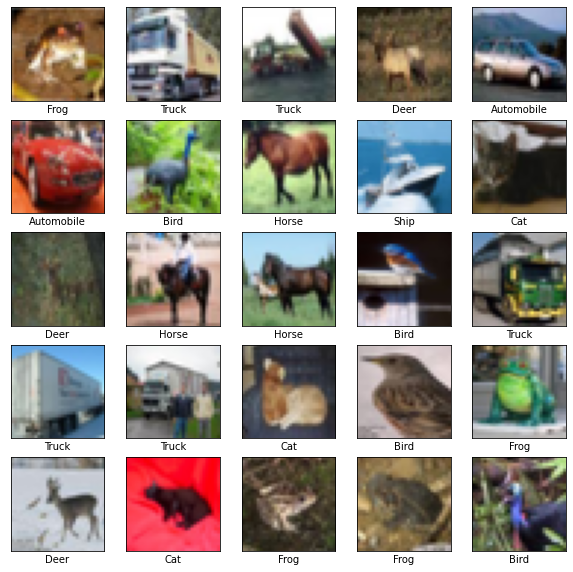

In [6]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer','Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [7]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(class_names[y[index]])

In [8]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])



In [9]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [10]:
cnn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = cnn.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1563/1563 [==============================] - 77s 48ms/step - loss: 1.5265 - accuracy: 0.4398 - val_loss: 1.2423 - val_accuracy: 0.5509
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.1649 - accuracy: 0.5868 - val_loss: 1.1209 - val_accuracy: 0.6096
Epoch 3/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.0140 - accuracy: 0.6434 - val_loss: 0.9990 - val_accuracy: 0.6477
Epoch 4/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.9129 - accuracy: 0.6789 - val_loss: 0.9252 - val_accuracy: 0.6771
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8513 - accuracy: 0.7016 - val_loss: 0.8670 - val_accuracy: 0.6986
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7938 - accuracy: 0.7210 - val_loss: 0.8695 - val_accuracy: 0.6985
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7387 - accuracy: 0.7403 - val_loss: 0.9117 - val_accura

In [11]:
cnn.fit(train_images, train_labels,validation_data=(test_images, test_labels),  epochs=10)

Epoch 1/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.5745 - accuracy: 0.7981 - val_loss: 0.8983 - val_accuracy: 0.7084
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.5383 - accuracy: 0.8102 - val_loss: 0.8880 - val_accuracy: 0.7087
Epoch 3/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.5067 - accuracy: 0.8220 - val_loss: 0.9133 - val_accuracy: 0.7051
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.4778 - accuracy: 0.8306 - val_loss: 0.9313 - val_accuracy: 0.7177
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4407 - accuracy: 0.8437 - val_loss: 0.9713 - val_accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.4181 - accuracy: 0.8514 - val_loss: 1.0845 - val_accuracy: 0.6984
Epoch 7/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.3941 - accuracy: 0.8591 - val_loss: 1.0152 -

313/313 - 4s - loss: 1.2044 - accuracy: 0.6958 - 4s/epoch - 12ms/step


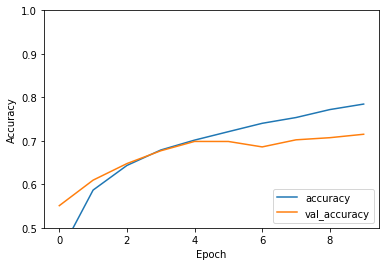

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = cnn.evaluate(test_images,  test_labels, verbose=2)

In [13]:
print(test_acc)

0.6958000063896179


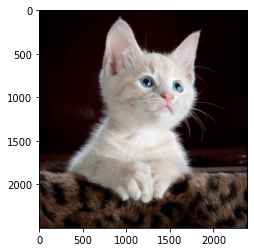

In [29]:
from keras.preprocessing import image
# Give the link of the image here to test 
testImage = img.imread('pic.jpg')
plt.imshow(testImage)
test_image1 =image.load_img('pic.jpg',target_size =(32,32))

In [17]:
test_image =image.img_to_array(test_image1) 
test_image =np.expand_dims(test_image, axis =0) 
result = cnn.predict(test_image) 
print(result) 
if result[0][0]==1: 
    print("Aeroplane") 
elif result[0][1]==1: 
    print('Automobile') 
elif result[0][2]==1: 
    print('Bird') 
elif result[0][3]==1: 
    print('Cat') 
elif result[0][4]==1: 
    print('Deer') 
elif result[0][5]==1: 
    print('Dog') 
elif result[0][6]==1: 
    print('Frog') 
elif result[0][7]==1: 
    print('Horse') 
elif result[0][8]==1: 
    print('Ship') 
elif result[0][9]==1: 
    print('Truck') 
else: 
    print('Error')

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
Cat
